<a href="https://colab.research.google.com/github/seungukkim/R_lecture/blob/main/day0706.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 분석 (머신러닝, 딥러닝) 프로세스
- 데이터 불러오기
  + CSV, 오라클, MySQL, PostgreSQL, 클라우드 DB 연동
- 탐색적 자료 분석
  + 데이터 전처리 및 가공
- 잠정적인 컬럼의 개수를 지정해야 함.
- 머신러닝 모델(= 통계 모델링,t.test, 분산분석, 교차분석)
- 머신러닝 모델의 경우 배포(X)
  + JSP 웹 개발 시 배우게 됨
- 통계 모델링 경우, p-value 값 기준으로, 귀무가설 및 대립가설 검정
- (공통) 결과 보고서를 작성해야함
  + PPT 만들어야 함. 

## 그래프 복습
- 수치형 데이터 시각화
- 번주형 데이터 시각화
- 데이터 관계 시각화 
- matplotlib 라이브러리 방법
- seaborn 라이브러리 방법
  + 복잡한 그래프 그려야지=> matplotlib
  + 1줄 그래프 -> seaborn

### 수치형 데이터 시각화 

In [120]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


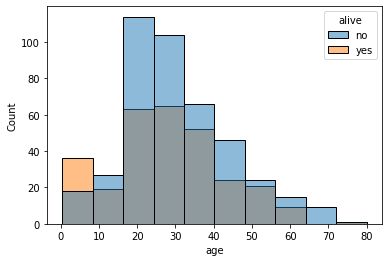

In [121]:
# 히스토그램
sns.histplot(data = titanic, x='age',bins=10,hue = 'alive')#bins= 간격

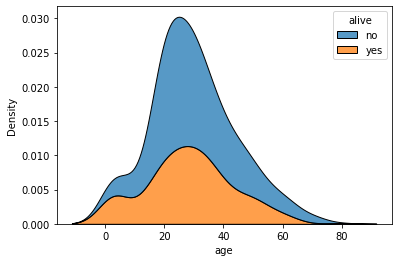

In [122]:
# 커널밀도추정 함수 그래프
# 연속형 데이터 1개만 쓸 때 사용
sns.kdeplot(data = titanic, x ='age',hue = 'alive',multiple='stack')

## 분포도
- 수치형 데이터 한 개 컬럼의 분포를 나타내는 그래프
- 정규분포인가?

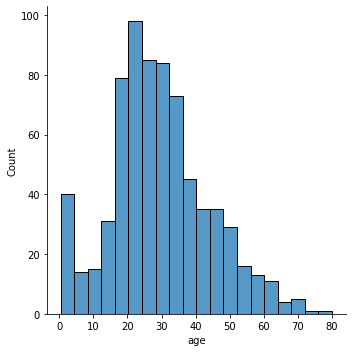

In [74]:
sns.displot(data = titanic, x='age')

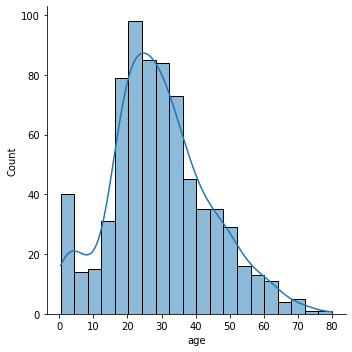

In [75]:
sns.displot(titanic, x='age', kde='True')

## 범주형 데이터 시각화
- x축 범주형, y축 수치 데이터
- x축 범주형, y축 범주형
  + 히트맵

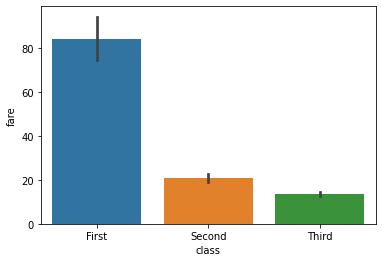

In [76]:
# 막대 그래프
sns.barplot(x='class', y='fare', data=titanic)

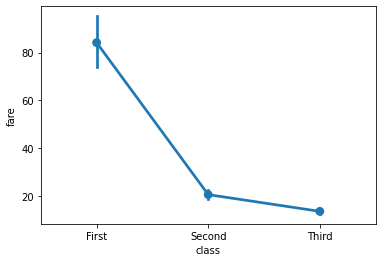

In [123]:
# 포인트 플롯
sns.pointplot(x='class', y='fare', data = titanic)

- boxplot
- 제 1사분위: 전체 데이터 중 하위 25%
- 사분위 범위 수 (IQR) : 제 3 사분위 - 제 1사분위
- 최댓값: 제 3사분위 +(1.5 * IQR)

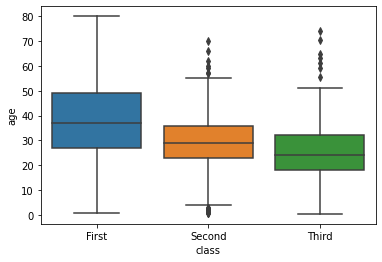

In [78]:
# boxplot
sns.boxplot(x='class', y='age', data =titanic)

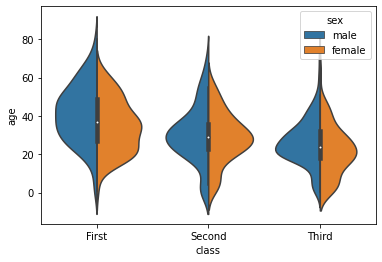

In [79]:
# 바이올린 플롯
sns.violinplot(x='class', y='age', hue='sex',data=titanic, split = True);

## 카운트 플롯
- 범주형 데이터의 개수 확인 할 때 사용 

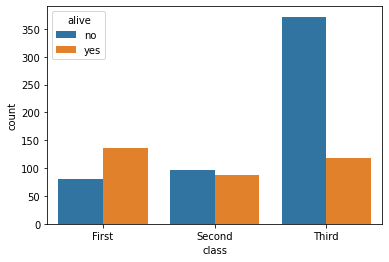

In [86]:
sns.countplot(x='class',hue='alive', data = titanic)

## 데이터 관계 시각화
- 여러 데이터 사이의 관계도 파악 위한 그래프 

In [80]:
# 히트맵
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [81]:
flights['year'].value_counts()

1949    12
1950    12
1951    12
1952    12
1953    12
1954    12
1955    12
1956    12
1957    12
1958    12
1959    12
1960    12
Name: year, dtype: int64

In [82]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


pivot 사용방법: 세로, 가로그리고 결과값으로 바꿀 수 있다.

In [83]:
import pandas as pd
from pandas import Series, DataFrame


In [84]:
flights_pivot=flights.pivot(index='month',columns='year',values='passengers')
flights_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


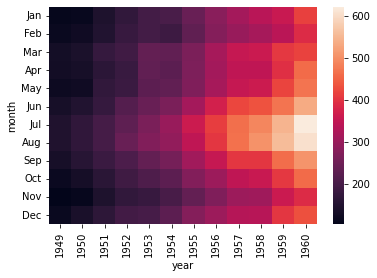

In [85]:
sns.heatmap(data= flights_pivot)

# 라인플롯


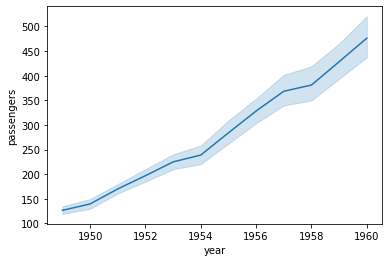

In [49]:
sns.lineplot(x ='year', y='passengers', data=flights)
# 신뢰구간이 있다

In [87]:
# 산점도
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


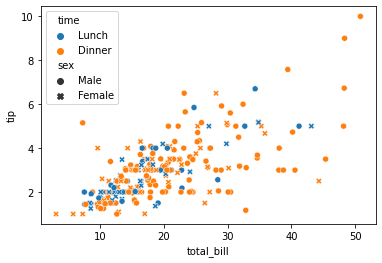

In [124]:
# 두 개의 연속형 데이터
sns.scatterplot(x='total_bill', y='tip',hue='time',style='sex',data = tips)

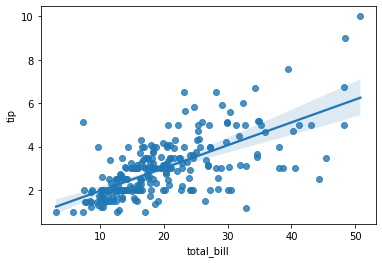

In [125]:
# 회귀선
sns.regplot(x='total_bill', y='tip', data= tips)

## 선형 회귀
- 선형 회귀식을 찾는 것이 중요
- $y = 3x + 4$에 근사한 데이터 50개 생성 

In [126]:
import numpy as np 
import pandas as pd

# 시드값 고정 
np.random.seed(0)
intercept = 4 # 절편, 상수
slope = 3 # 기울기

# 변동성 주기 위해 노이즈 생성
noise = np.random.randn(50, 1)
x = 5 * np.random.rand(50, 1) # 0과 5사이의 실숫값 50개 생성
y = slope * x + intercept + noise

# 데이터 프레임 생성
data = pd.DataFrame({'X' : x[:, 0], 'Y' : y[:, 0]})
print(data)

           X          Y
0   0.794848   8.148596
1   0.551876   6.055784
2   3.281648  14.823682
3   0.690915   8.313637
4   0.982912   8.816293
5   1.843626   8.553600
6   4.104966  17.264987
7   0.485506   5.305162
8   4.189725  16.465955
9   0.480492   5.852075
10  4.882297  18.790936
11  2.343256  12.484042
12  4.883805  19.412454
13  3.024228  13.194358
14  3.696318  15.532817
15  0.195939   4.921491
16  1.414035   9.736184
17  0.600983   5.597790
18  1.480701   8.755171
19  0.593639   4.926820
20  1.589916   6.216758
21  2.071315  10.867564
22  0.320737   5.826649
23  3.462361  13.644917
24  2.833007  14.768776
25  1.326947   6.526477
26  2.616240  11.894479
27  0.469703   5.221924
28  2.879732  14.171977
29  4.646481  19.408802
30  1.592845   8.933482
31  3.337052  14.389318
32  0.658989   5.089182
33  3.581636  12.764112
34  1.447030   7.993179
35  0.915957   6.904219
36  2.932565  14.027985
37  0.100538   5.503993
38  4.144700  16.046774
39  0.023477   3.768129
40  3.389083  13

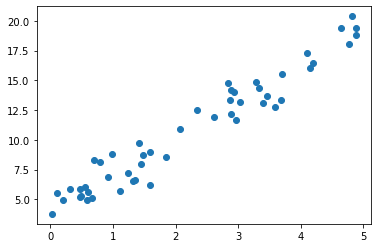

In [127]:

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(data['X'], data['Y'])
plt.show()

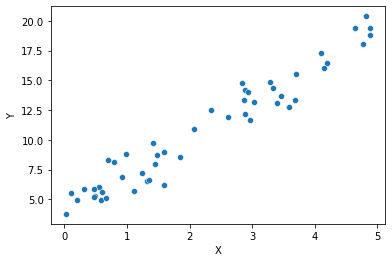

In [128]:
import seaborn as sns 
sns.scatterplot(x = 'X', y = 'Y', data = data)

# 선형 회귀 모형 훈련
- 모형 생성 후, 회귀 계수 3과 y 절편 4에 근사한 값이 나와야 한다.

In [129]:
from sklearn.linear_model import LinearRegression 
lr_model = LinearRegression() # 선형 회귀 모델 
lr_model.fit(x, y) # 모델 훈련

print('y절편:', lr_model.intercept_)
print('회귀계수:', lr_model.coef_)

y절편: [4.05757639]
회귀계수: [[3.03754061]]


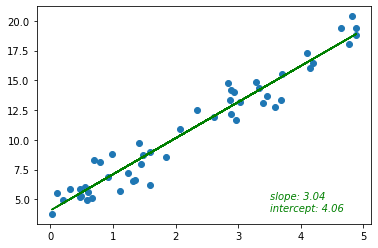

In [130]:
# 예측값
y_pred = lr_model.predict(x)
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, y_pred, color='green')

# slope, intercept 
label = 'slope: {}\nintercept: {}'.format(round(lr_model.coef_[0][0], 2), round(lr_model.intercept_[0], 2))
ax.text(3.5, 4, label, style ='italic', 
        fontsize = 10, color ="green")
plt.show()

## 로지스틱 회귀


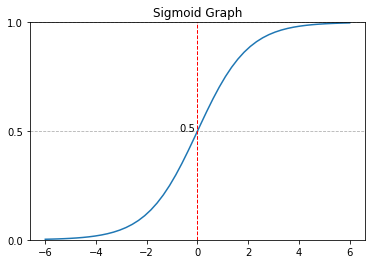

In [131]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(arr, scale=1):
    arr = np.asarray(arr)
    result = 1/(1 + np.exp(-arr*scale))
    return result

x = np.linspace(-6, 6)
y = sigmoid(x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.grid(which='major', axis='y', linestyle='--')
ax.axvline(x=0, color='r', linestyle='--', linewidth=1)
ax.set_ylim(0,1)
ax.set_yticks([0, 1, 0.5])
ax.text(0-0.1, 0.5, '0.5', ha='right')
ax.set_title('Sigmoid Graph')
plt.show()

In [132]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 데이터 가져오기
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# 모델 생성 및 학습
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

# 모형 평가


In [133]:
p_pred = model.predict_proba(x)
print('p_pred', p_pred, sep='\n')

p_pred
[[0.97979027 0.02020973]
 [0.94958202 0.05041798]
 [0.87976149 0.12023851]
 [0.73975066 0.26024934]
 [0.52477284 0.47522716]
 [0.30020373 0.69979627]
 [0.1428487  0.8571513 ]
 [0.06080627 0.93919373]
 [0.02453462 0.97546538]
 [0.00967652 0.99032348]]


In [134]:
y_pred = model.predict(x)
print('y_pred',y_pred)

y_pred [0 0 0 0 0 1 1 1 1 1]


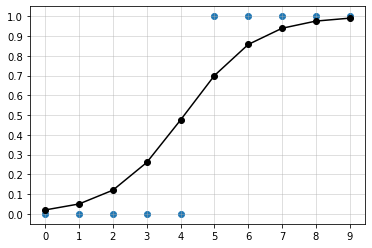

In [135]:
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, p_pred[:, 1], color = 'black',  marker='o', markersize=6)
ax.plot()

ax.set_xticks(x)
ax.set_yticks(np.arange(0, 1.1, 0.1))

ax.grid(which='major', alpha=0.5)
plt.show()

In [136]:
conf_m = confusion_matrix(y, y_pred)
print(conf_m)

[[5 0]
 [0 5]]


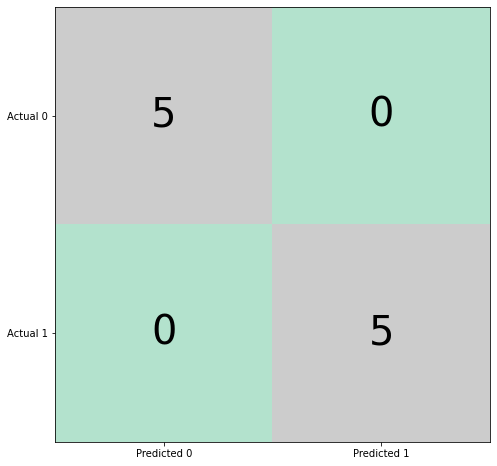

In [137]:
cm = confusion_matrix(y, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap = 'Pastel2')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0', 'Predicted 1'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0', 'Actual 1'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=40)
plt.show()

### 결정 트리
- 분류와 회귀 문제에 모두 사용 가능
### 주요 개념
- 작동 원리
  + 데이터를 가장 잘 구분하는 조건을 정함.
  + 조건을 기준으로 데이터를 두 범주로 나눔
  + 나뉜 각 범주의 데이터를 구분하는 조건을 정함
  + 각 조건을 기준으로 데이터를 두 범주로 나눔
  + 언제까지 계속 분할할지 정한 후, 최종 결정 값을 구함.
- 불순도(Impurity)
  + 한 범주 안에 서로 다른 데이터가 얼마나 섞여 있는지 나타냄
  + 흰색과 검은색이 50:50으로 섞여 있다. (불순도 최대)
  + 흰색과 검은색으로 완전 분리 되었다. (불순도 최소)
- 엔트로피(Entropy)
  + 불확실한 정도를 의미함. 0 ~ 1로 정함.
  + 흰색과 검은색이 50:50으로 섞여 있다. 엔트로피 1
  + 흰색과 검은색으로 완전 분리 되었다. 엔트로피 0
- 정보이득(Information Gain)
  + 1에서 엔트로피를 뺀 수치
  + 정보 이득을 최대화하는 방향(엔트로피를 최소화 하는 방향)으로 노드를 분할함
- 지니 불순도(Gini Impurity)
  + 지니 불순도 값이 클수록 불순도도 높고, 작을수록 불순도도 낮음. 엔트로피와 마찬가지로 지니 불순도가 낮아지는 방향으로 노드 분할함.

In [138]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
import seaborn as sns 

# tips 데이터셋 
titanic = sns.load_dataset('titanic')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


-survived의 비율을 구한다.
0: 사망자
1: 생존자


In [139]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [140]:
# 데이터 추출
X = titanic[['pclass', 'parch', 'fare']]
y = titanic['survived']

# 훈련데이터, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((623, 3), (268, 3), (623,), (268,))

In [141]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

acc = tree_model.score(X_test, y_test)
print(f'모형 정확도 : {acc:.3f}') # 정확도 측정

모형 정확도 : 0.675


#### 랜덤포레스

In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
import seaborn as sns 

# tips 데이터셋 
titanic = sns.load_dataset('titanic')

X = titanic[['pclass', 'parch', 'fare']]
y = titanic['survived']

# 훈련데이터, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state=42)

# 모델 훈련
rf_model = RandomForestClassifier(random_state=42) # 랜덤 포레스트 정의
rf_model.fit(X_train, y_train)

acc = tree_model.score(X_test, y_test)
print(f'모형 정확도 : {acc:.3f}') # 정확도 측정 ㅠ

모형 정확도 : 0.675


## XGBoost& LightGBM
- 전통적인 머신러닝 알고리즘의 융합
  + 선형회귀 릿지 라쏘, 과적합 방지 위한 규제
  + 결정 트리의 핵심적인 알고리즘
  + 경사 하강법
  + 부스팅 기법
- 문제점: 파라미터의 개수가 매우 많음
- 왜 많이 쓸까?
  + 모델 학습 속도
  + 성능
  - 가장 좋은 모델이란, 학습 속도는 빠르면서 성능은 좋은 것(지금까지 나온 알고리즘 보다)

- Python
  + JAVA, C, C++
  + C, C++
  + 첫번째 옵션, 우리가 자체적으로 배포하자 -> Python Wrapper API|-R, 머신러닝 프레임워크 종류 다양
  + 두번째 옵션 파이썬 머신러닝 = Scikit_Learn에서 쉽게 쓸 수 있도록 개발, Scikit-Learn Wrapper APi

In [144]:
import xgboost as xgb 
from sklearn.model_selection import train_test_split
import seaborn as sns 

# 데이터 분리
titanic = sns.load_dataset('titanic')
# titanic.info()

# X, 독립변수, y 종속변수
X = titanic[['pclass', 'parch', 'fare']]
y = titanic['survived']

# 훈련데이터, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify = y, 
                                                    test_size = 0.3, 
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((623, 3), (268, 3), (623,), (268,))

- 여기가 핵심


In [146]:
dtrain = xgb.DMatrix(data = X_train, label = y_train)
dtest = xgb.DMatrix(data = X_test,label = y_test)

print(dtrain)

- 머신러닝 코드 

In [155]:
params = {
    'max_depth':3,
    'n_estimators':100,
    'eta':0.1,
    'objective':'binary:logistic'
    
}
num_rounds = 400
w_list =[(dtrain,'train'),(dtest,'test')]
xgb_ml = xgb.train(params = params,
                   dtrain=dtrain,
                   num_boost_round=400,
                   early_stopping_rounds =100,
                   evals= w_list)

[0]	train-error:0.260032	test-error:0.302239
Multiple eval metrics have been passed: 'test-error' will be used for early stopping.

Will train until test-error hasn't improved in 100 rounds.
[1]	train-error:0.260032	test-error:0.302239
[2]	train-error:0.260032	test-error:0.302239
[3]	train-error:0.260032	test-error:0.302239
[4]	train-error:0.260032	test-error:0.302239
[5]	train-error:0.260032	test-error:0.302239
[6]	train-error:0.260032	test-error:0.302239
[7]	train-error:0.260032	test-error:0.302239
[8]	train-error:0.260032	test-error:0.302239
[9]	train-error:0.260032	test-error:0.302239
[10]	train-error:0.260032	test-error:0.302239
[11]	train-error:0.260032	test-error:0.302239
[12]	train-error:0.260032	test-error:0.302239
[13]	train-error:0.247191	test-error:0.298507
[14]	train-error:0.247191	test-error:0.298507
[15]	train-error:0.248796	test-error:0.302239
[16]	train-error:0.248796	test-error:0.302239
[17]	train-error:0.248796	test-error:0.302239
[18]	train-error:0.248796	test-error

In [153]:
from sklearn.metrics import accuracy_score
pred_probs =xgb_ml.predict(dtest)
y_pred = [1 if x>0.5 else 0 for x in pred_probs]

accuracy_score(y_pred,y_test)

0.6977611940298507

In [157]:
#scikit-learn api 방식

In [161]:
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier #API방식

# dt = DecisionTreeClassifier()
xgb_model = XGBClassifier(objective = 'binary:logistic',
                          max_depth=3,
                          learning_rate = 0.1,
                          n_estimators=100,
                          random_state = 42)

w_list = [(X_train,y_train),(X_test,y_test)]
xgb_model.fit(X_train,y_train,eval_set =w_list, eval_metric='error',verbose=True)

y_probas = xgb_model.predict_proba(X_test)
y_pred = [1 if x>0.5 else 0 for x in pred_probs]

accuracy_score(y_pred,y_test)

[0]	validation_0-error:0.260032	validation_1-error:0.302239
[1]	validation_0-error:0.260032	validation_1-error:0.302239
[2]	validation_0-error:0.260032	validation_1-error:0.302239
[3]	validation_0-error:0.260032	validation_1-error:0.302239
[4]	validation_0-error:0.260032	validation_1-error:0.302239
[5]	validation_0-error:0.260032	validation_1-error:0.302239
[6]	validation_0-error:0.260032	validation_1-error:0.302239
[7]	validation_0-error:0.260032	validation_1-error:0.302239
[8]	validation_0-error:0.260032	validation_1-error:0.302239
[9]	validation_0-error:0.260032	validation_1-error:0.302239
[10]	validation_0-error:0.260032	validation_1-error:0.302239
[11]	validation_0-error:0.260032	validation_1-error:0.302239
[12]	validation_0-error:0.260032	validation_1-error:0.302239
[13]	validation_0-error:0.247191	validation_1-error:0.298507
[14]	validation_0-error:0.247191	validation_1-error:0.298507
[15]	validation_0-error:0.248796	validation_1-error:0.302239
[16]	validation_0-error:0.248796	v

0.6977611940298507

### LightGBM Python Wrapper 방식

In [162]:
import lightgbm as lgb 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
import seaborn as sns 

# tips 데이터셋 
titanic = sns.load_dataset('titanic')

X = titanic[['pclass', 'parch', 'fare']]
y = titanic['survived']

# 훈련데이터, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state=42)

# XGBoost 코드와 유사하다. 
dtrain = lgb.Dataset(data = X_train, label = y_train)
dtest = lgb.Dataset(data = X_test, label = y_test)

params = {'max_depth':3,
          'n_estimators':100,
          'learning_rate': 0.1,
          'objective':'binary',
          'metric' : 'binary_error', 
          'num_boost_round' : 400, 
          'verbose' : 1} 

w_list = [dtrain, dtest]
lgb_ml = lgb.train(params=params, train_set = dtrain,\
                  early_stopping_rounds=100, valid_sets= w_list)

pred_probs = lgb_ml.predict(X_test)
y_pred=[1 if x > 0.5 else 0 for x in pred_probs]

# 예측 라벨과 실제 라벨 사이의 정확도 측정
accuracy_score(y_pred, y_test)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_error: 0.383628	valid_1's binary_error: 0.384328
Training until validation scores don't improve for 100 rounds.
[2]	training's binary_error: 0.383628	valid_1's binary_error: 0.384328
[3]	training's binary_error: 0.354735	valid_1's binary_error: 0.369403
[4]	training's binary_error: 0.29695	valid_1's binary_error: 0.354478
[5]	training's binary_error: 0.272873	valid_1's binary_error: 0.33209
[6]	training's binary_error: 0.272873	valid_1's binary_error: 0.33209
[7]	training's binary_error: 0.269663	valid_1's binary_error: 0.317164
[8]	training's binary_error: 0.269663	valid_1's binary_error: 0.317164
[9]	training's binary_error: 0.264848	valid_1's binary_error: 0.309701
[10]	training's binary_error: 0.269663	valid_1's binary_error: 0.309701
[11]	training's binary_error: 0.264848	valid_1's binary_error: 0.309701
[12]	training's binary_error: 0.264848	valid_1's binary_error: 0.309701
[13]	training's binary_error: 0.264848	valid_1's binary_error: 0.309701
[14]	training

0.6940298507462687

In [163]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# model 
w_list = [dtrain, dtest]
model = LGBMClassifier(objective = 'binary', 
                       metric = 'binary_error',
                       n_estimators=100, 
                       learning_rate=0.1, 
                       max_depth=3, 
                       num_boost_round = 400,
                       random_state = 32)
model.fit(X_train, 
          y_train, 
          eval_set = [(X_train, y_train), (X_test, y_test)], 
          verbose=1,
          early_stopping_rounds = 100)
y_probas = model.predict_proba(X_test) 
y_pred=[1 if x > 0.5 else 0 for x in y_probas[:, 1]] # 예측 라벨(0과 1로 예측)

# 예측 라벨과 실제 라벨 사이의 정확도 측정
accuracy_score(y_pred, y_test)

[1]	training's binary_error: 0.383628	valid_1's binary_error: 0.384328
Training until validation scores don't improve for 100 rounds.
[2]	training's binary_error: 0.383628	valid_1's binary_error: 0.384328
[3]	training's binary_error: 0.354735	valid_1's binary_error: 0.369403
[4]	training's binary_error: 0.29695	valid_1's binary_error: 0.354478
[5]	training's binary_error: 0.272873	valid_1's binary_error: 0.33209
[6]	training's binary_error: 0.272873	valid_1's binary_error: 0.33209
[7]	training's binary_error: 0.269663	valid_1's binary_error: 0.317164
[8]	training's binary_error: 0.269663	valid_1's binary_error: 0.317164
[9]	training's binary_error: 0.264848	valid_1's binary_error: 0.309701
[10]	training's binary_error: 0.269663	valid_1's binary_error: 0.309701
[11]	training's binary_error: 0.264848	valid_1's binary_error: 0.309701
[12]	training's binary_error: 0.264848	valid_1's binary_error: 0.309701
[13]	training's binary_error: 0.264848	valid_1's binary_error: 0.309701
[14]	training

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


0.6940298507462687